# 필요한 라이브러리 설치

In [2]:
# 필요한 라이브러리 설치
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import sklearn
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
import missingno as msno
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import OrderedDict
import math

# 파일 불러오기 - 6class

In [3]:
# 파일 받아오기
# 6class

Sdf = pd.read_csv('Sdf_6label.csv')
Mdf = pd.read_csv('Mdf_6label.csv')
Kdf = pd.read_csv('Kdf_6label.csv')

# 파일 불러오기 - 3class

In [4]:
'''
# 파일 받아오기
# 3class

simple_imputer = pd.read_csv('jdf.csv')
KNN_dataframes = pd.read_csv('idf.csv')
MICE_dataframe = pd.read_csv('kdf.csv')

simple_imputer = simple_imputer.replace({'bankruptcy':5.0},0.0)
simple_imputer = simple_imputer.replace({'bankruptcy':2.0},1.0)
simple_imputer = simple_imputer.replace({'bankruptcy':4.0},2.0)
simple_imputer = simple_imputer.replace({'bankruptcy':3.0},2.0)

KNN_dataframes = simple_imputer.replace({'bankruptcy':5.0},0.0)
KNN_dataframes = simple_imputer.replace({'bankruptcy':2.0},1.0)
KNN_dataframes = simple_imputer.replace({'bankruptcy':4.0},2.0)
KNN_dataframes = simple_imputer.replace({'bankruptcy':3.0},2.0)

MICE_dataframe = simple_imputer.replace({'bankruptcy':5.0},0.0)
MICE_dataframe = simple_imputer.replace({'bankruptcy':2.0},1.0)
MICE_dataframe = simple_imputer.replace({'bankruptcy':4.0},2.0)
MICE_dataframe = simple_imputer.replace({'bankruptcy':3.0},2.0)

'''

"\n# 파일 받아오기\n# 3class\n\nsimple_imputer = pd.read_csv('jdf.csv')\nKNN_dataframes = pd.read_csv('idf.csv')\nMICE_dataframe = pd.read_csv('kdf.csv')\n\nsimple_imputer = simple_imputer.replace({'bankruptcy':5.0},0.0)\nsimple_imputer = simple_imputer.replace({'bankruptcy':2.0},1.0)\nsimple_imputer = simple_imputer.replace({'bankruptcy':4.0},2.0)\nsimple_imputer = simple_imputer.replace({'bankruptcy':3.0},2.0)\n\nKNN_dataframes = simple_imputer.replace({'bankruptcy':5.0},0.0)\nKNN_dataframes = simple_imputer.replace({'bankruptcy':2.0},1.0)\nKNN_dataframes = simple_imputer.replace({'bankruptcy':4.0},2.0)\nKNN_dataframes = simple_imputer.replace({'bankruptcy':3.0},2.0)\n\nMICE_dataframe = simple_imputer.replace({'bankruptcy':5.0},0.0)\nMICE_dataframe = simple_imputer.replace({'bankruptcy':2.0},1.0)\nMICE_dataframe = simple_imputer.replace({'bankruptcy':4.0},2.0)\nMICE_dataframe = simple_imputer.replace({'bankruptcy':3.0},2.0)\n\n"

# x, y 나누기

In [5]:
Mx = Mdf.drop(labels=['bankruptcy'], axis=1)
My = Mdf['bankruptcy'].to_frame()

In [6]:
#Mx.head()

In [7]:
Kx = Kdf.drop(labels=['bankruptcy'], axis=1)
Ky = Kdf['bankruptcy'].to_frame()

In [8]:
#Kx.head()

In [9]:
Sx = Sdf.drop(labels=['bankruptcy'], axis=1)
Sy = Sdf['bankruptcy'].to_frame()

In [10]:
#Sx.head()

# Oversampling 진행

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

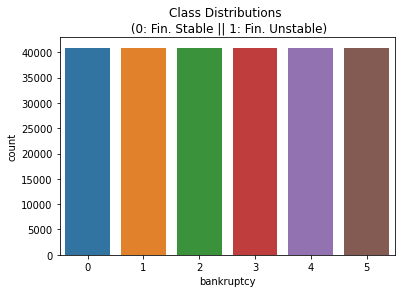

In [11]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Mdf, My = smote.fit_resample(Mx, My)

sns.countplot(x=My['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

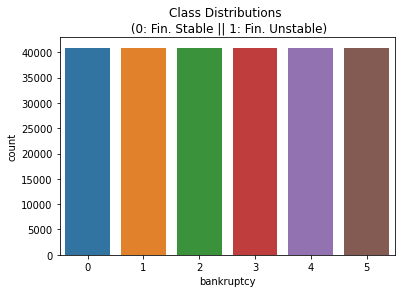

In [12]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Kdf, Ky = smote.fit_resample(Kx, Ky)

sns.countplot(x=Ky['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

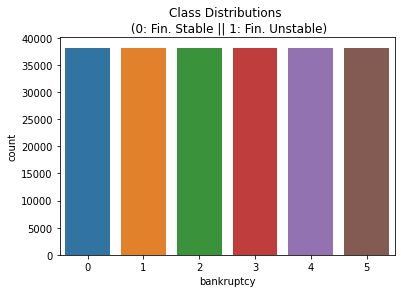

In [13]:
# SMOTE 패키지로 oversampling 진행
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
Sdf, Sy = smote.fit_resample(Sx, Sy)

sns.countplot(x=Sy['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

# Train, Test 셋 나누기

In [14]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분

Mx_train, Mx_test, My_train, My_test = train_test_split(Mdf, My,test_size=0.3,random_state=2022)

In [15]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분

Kx_train, Kx_test, Ky_train, Ky_test = train_test_split(Kdf, Ky,test_size=0.3,random_state=2022)

In [16]:
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분

Sx_train, Sx_test, Sy_train, Sy_test = train_test_split(Sdf, Sy,test_size=0.3,random_state=2022)

# 모델 구축 ( KNN )

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
Mmodel = KNeighborsClassifier(n_neighbors = 5)
Mmodel.fit(Mx_train, My_train)

KNeighborsClassifier()

In [19]:
Kmodel = KNeighborsClassifier(n_neighbors = 5)
Kmodel.fit(Kx_train, Ky_train)

KNeighborsClassifier()

In [20]:
Smodel = KNeighborsClassifier(n_neighbors = 5)
Smodel.fit(Sx_train, Sy_train)

KNeighborsClassifier()

# Unseen 데이터 셋 불러오기

In [21]:
Mdf_unseen =  pd.read_csv("Mdf_unseen_6label.csv")
Sdf_unseen =  pd.read_csv("Sdf_unseen_6label.csv")
Kdf_unseen =  pd.read_csv("Kdf_unseen_6label.csv")

# Unseen x,y 나누기

In [22]:
Mx = Mdf_unseen.drop(labels=['bankruptcy'], axis=1)
My = Mdf_unseen['bankruptcy'].to_frame()

In [23]:
Kx = Kdf_unseen.drop(labels=['bankruptcy'], axis=1)
Ky = Kdf_unseen['bankruptcy'].to_frame()

In [24]:
Sx = Sdf_unseen.drop(labels=['bankruptcy'], axis=1)
Sy = Sdf_unseen['bankruptcy'].to_frame()

# Unseen 으로 예측

In [25]:
My_pred=Mmodel.predict(Mx)

In [26]:
Ky_pred=Kmodel.predict(Kx)

In [27]:
Sy_pred=Smodel.predict(Sx)

# Unseen 예측 정확도 확인

In [28]:
print("훈련 세트 정확도: {:.3f}".format(Mmodel.score(Mx_train, My_train)))
print("테스트 세트 정확도: {:.3f}".format(Mmodel.score(Mx, My)))

훈련 세트 정확도: 0.954
테스트 세트 정확도: 0.883


In [ ]:
print("훈련 세트 정확도: {:.3f}".format(Kmodel.score(Kx_train, Ky_train)))
print("테스트 세트 정확도: {:.3f}".format(Kmodel.score(Kx, Ky)))

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(Smodel.score(Sx_train, Sy_train)))
print("테스트 세트 정확도: {:.3f}".format(Smodel.score(Sx, Sy)))

# Unseen 성능 지표 확인

In [ ]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
print("Train_Accuracy : ", Mmodel.score(Mx_train, My_train), '\n')
print("Test_Accuracy : ", Mmodel.score(Mx, My), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(My, My_pred)
recall = mt.recall_score(My, My_pred,average='micro')
precision = mt.precision_score(My, My_pred,average='micro')
f1_score = mt.f1_score(My, My_pred,average='micro')
matrix = mt.confusion_matrix(My, My_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

In [ ]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
print("Train_Accuracy : ", Kmodel.score(Kx_train, Ky_train), '\n')
print("Test_Accuracy : ", Kmodel.score(Kx, Ky), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(Ky, Ky_pred)
recall = mt.recall_score(Ky, Ky_pred,average='micro')
precision = mt.precision_score(Ky, Ky_pred,average='micro')
f1_score = mt.f1_score(Ky, Ky_pred,average='micro')
matrix = mt.confusion_matrix(Ky, Ky_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

In [ ]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
print("Train_Accuracy : ", Smodel.score(Sx_train, Sy_train), '\n')
print("Test_Accuracy : ", Smodel.score(Sx, Sy), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(Sy, Sy_pred)
recall = mt.recall_score(Sy, Sy_pred,average='micro')
precision = mt.precision_score(Sy, Sy_pred,average='micro')
f1_score = mt.f1_score(Sy, Sy_pred,average='micro')
matrix = mt.confusion_matrix(Sy, Sy_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

# 모델 예측

In [20]:
My_pred=Mmodel.predict(Mx_test)

In [21]:
Ky_pred=Kmodel.predict(Kx_test)

In [22]:
Sy_pred=Smodel.predict(Sx_test)

# 예측 정확도 확인

In [23]:
print("훈련 세트 정확도: {:.3f}".format(Mmodel.score(Mx_train, My_train)))
print("테스트 세트 정확도: {:.3f}".format(Mmodel.score(Mx_test, My_test)))

훈련 세트 정확도: 0.940
테스트 세트 정확도: 0.916


In [24]:
print("훈련 세트 정확도: {:.3f}".format(Kmodel.score(Kx_train, Ky_train)))
print("테스트 세트 정확도: {:.3f}".format(Kmodel.score(Kx_test, Ky_test)))

훈련 세트 정확도: 0.941
테스트 세트 정확도: 0.917


In [25]:
print("훈련 세트 정확도: {:.3f}".format(Smodel.score(Sx_train, Sy_train)))
print("테스트 세트 정확도: {:.3f}".format(Smodel.score(Sx_test, Sy_test)))

훈련 세트 정확도: 0.938
테스트 세트 정확도: 0.914


# Train set 성능 지표 확인 ( + Confusion Matrix )

In [26]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
print("Train_Accuracy : ", Mmodel.score(Mx_train, My_train), '\n')
print("Test_Accuracy : ", Mmodel.score(Mx_test, My_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(My_test, My_pred)
recall = mt.recall_score(My_test, My_pred,average='micro')
precision = mt.precision_score(My_test, My_pred,average='micro')
f1_score = mt.f1_score(My_test, My_pred,average='micro')
matrix = mt.confusion_matrix(My_test, My_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  0.9400381781569728 

Test_Accuracy :  0.9163498098859315 

Accuracy:  0.92 

Recall:  0.92 

Precision:  0.92 

F1_score:  0.92 

Confusion Matrix: 
 [[ 7321   892  1025  1132  1132   927]
 [   50 12085    68    25    27    23]
 [   39    79 12103    59    19    42]
 [   42    43    58 12039    52    40]
 [   56    33    50    55 11753    48]
 [   34    31    25    18    36 12179]]


In [27]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
print("Train_Accuracy : ", Kmodel.score(Kx_train, Ky_train), '\n')
print("Test_Accuracy : ", Kmodel.score(Kx_test, Ky_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(Ky_test, Ky_pred)
recall = mt.recall_score(Ky_test, Ky_pred,average='micro')
precision = mt.precision_score(Ky_test, Ky_pred,average='micro')
f1_score = mt.f1_score(Ky_test, Ky_pred,average='micro')
matrix = mt.confusion_matrix(Ky_test, Ky_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  0.9407714781232177 

Test_Accuracy :  0.9166349809885932 

Accuracy:  0.92 

Recall:  0.92 

Precision:  0.92 

F1_score:  0.92 

Confusion Matrix: 
 [[ 7410   895   925  1108  1091  1000]
 [   60 12065    72    30    24    27]
 [   37    76 12095    60    24    49]
 [   51    49    58 12019    48    49]
 [   59    42    50    44 11744    56]
 [   36    36    32    20    31 12168]]


In [28]:
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
# 학습결과 평가
print("Train_Accuracy : ", Smodel.score(Sx_train, Sy_train), '\n')
print("Test_Accuracy : ", Smodel.score(Sx_test, Sy_test), '\n')

# 다중 클래스 분류일 경우 average='micro' 를 하이퍼파라미터로 넣어줌(accuracy, matrix 제외)
accuracy = mt.accuracy_score(Sy_test, Sy_pred)
recall = mt.recall_score(Sy_test, Sy_pred,average='micro')
precision = mt.precision_score(Sy_test, Sy_pred,average='micro')
f1_score = mt.f1_score(Sy_test, Sy_pred,average='micro')
matrix = mt.confusion_matrix(Sy_test, Sy_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  0.9379648115797354 

Test_Accuracy :  0.914182146392593 

Accuracy:  0.91 

Recall:  0.91 

Precision:  0.91 

F1_score:  0.91 

Confusion Matrix: 
 [[ 6750   775   945   997  1122   971]
 [   37 11259    48    24    24    25]
 [   40    72 11261    48    28    47]
 [   71    39    69 11098    56    48]
 [   90    31    44    41 11216    45]
 [   47    31    26    22    32 11213]]
